Alexnet Model evaluation

In [1]:
from keras.models import load_model

# Load the saved model
model1 = load_model('New_Alexnet_1.h5')


In [2]:
import tensorflow as tf
#from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import cv2

Found 0 images belonging to 0 classes.
Found 5163 images belonging to 3 classes.
1/1 [==============================] - 3s 3s/step
The confidence score for class 0 is 0.99317425
The confidence score for class 1 is 0.0016853033
The confidence score for class 2 is 0.005140431


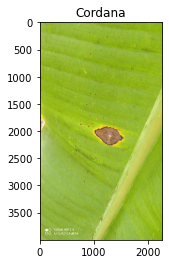

1/1 [==============================] - 0s 78ms/step
The confidence score for class 0 is 0.9994234
The confidence score for class 1 is 0.00031948255
The confidence score for class 2 is 0.0002570657


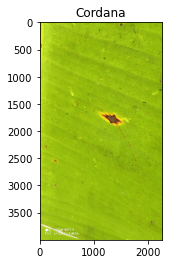

1/1 [==============================] - 0s 31ms/step
The confidence score for class 0 is 0.9937849
The confidence score for class 1 is 0.00013615462
The confidence score for class 2 is 0.0060789473


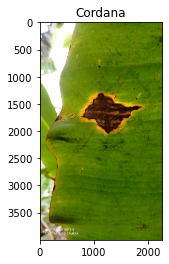

1/1 [==============================] - 0s 33ms/step
The confidence score for class 0 is 0.90274733
The confidence score for class 1 is 0.097181275
The confidence score for class 2 is 7.14878e-05


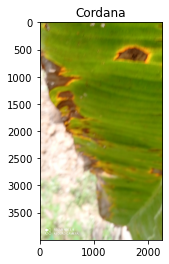

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.9999615
The confidence score for class 1 is 1.5586766e-05
The confidence score for class 2 is 2.2875693e-05


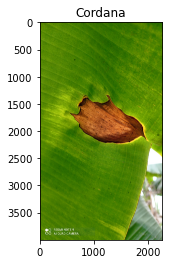

1/1 [==============================] - 0s 79ms/step
The confidence score for class 0 is 0.99825007
The confidence score for class 1 is 0.0013596022
The confidence score for class 2 is 0.00039027532


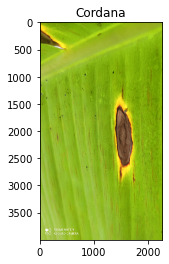

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.9777713
The confidence score for class 1 is 0.008865141
The confidence score for class 2 is 0.013363496


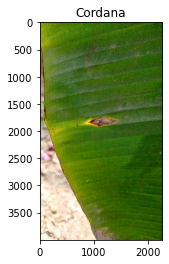

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.9768504
The confidence score for class 1 is 0.0020065766
The confidence score for class 2 is 0.021143062


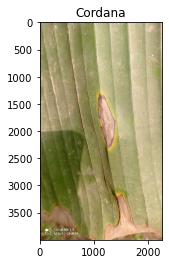

1/1 [==============================] - 0s 55ms/step
The confidence score for class 0 is 0.6164909
The confidence score for class 1 is 0.04880287
The confidence score for class 2 is 0.33470628


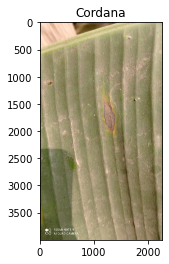

1/1 [==============================] - 0s 47ms/step
The confidence score for class 0 is 0.85526794
The confidence score for class 1 is 0.001792768
The confidence score for class 2 is 0.14293933


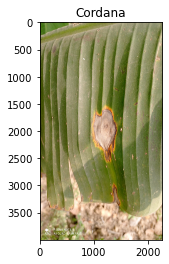

1/1 [==============================] - 0s 47ms/step
The confidence score for class 0 is 0.8116685
The confidence score for class 1 is 0.14505571
The confidence score for class 2 is 0.04327582


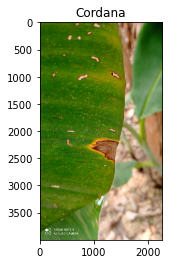

1/1 [==============================] - 0s 47ms/step
The confidence score for class 0 is 0.124507256
The confidence score for class 1 is 0.15533713
The confidence score for class 2 is 0.72015566


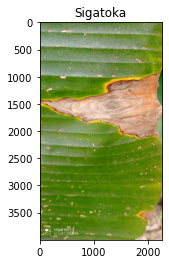

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.87980473
The confidence score for class 1 is 0.007157664
The confidence score for class 2 is 0.113037564


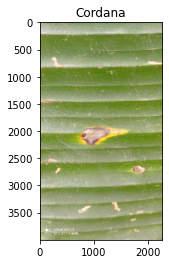

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.6688054
The confidence score for class 1 is 0.008331042
The confidence score for class 2 is 0.3228635


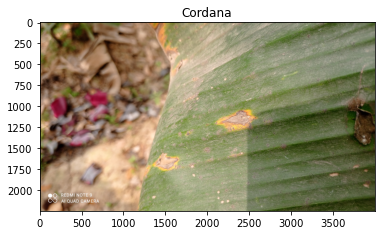

1/1 [==============================] - 0s 88ms/step
The confidence score for class 0 is 0.64597875
The confidence score for class 1 is 0.0019794176
The confidence score for class 2 is 0.35204178


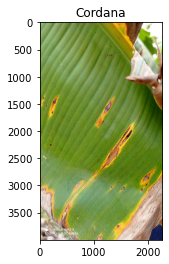

1/1 [==============================] - 0s 48ms/step
The confidence score for class 0 is 0.8198446
The confidence score for class 1 is 0.001466774
The confidence score for class 2 is 0.1786886


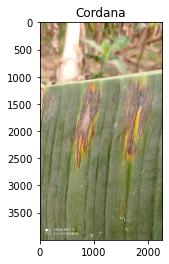

1/1 [==============================] - 0s 47ms/step
The confidence score for class 0 is 0.9066147
The confidence score for class 1 is 0.015841154
The confidence score for class 2 is 0.07754407


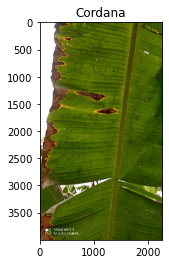

1/1 [==============================] - 0s 63ms/step
The confidence score for class 0 is 0.863869
The confidence score for class 1 is 0.0022544074
The confidence score for class 2 is 0.13387662


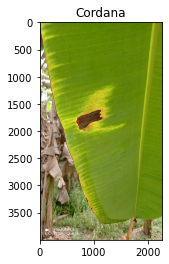

1/1 [==============================] - 0s 47ms/step
The confidence score for class 0 is 0.6948295
The confidence score for class 1 is 0.14242694
The confidence score for class 2 is 0.16274355


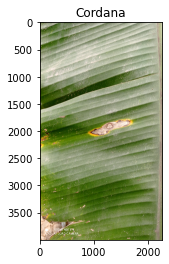

1/1 [==============================] - 0s 31ms/step
The confidence score for class 0 is 0.9397874
The confidence score for class 1 is 0.012544433
The confidence score for class 2 is 0.04766818


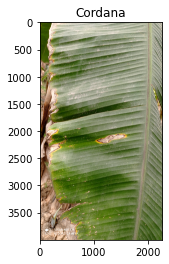

In [5]:
# Set the directory path containing the test images
test_dir =r"C:\Users\shrav\Banana leaf disease detection\Untitled Folder\dataset1\test1\cordana"
train_dir=r"C:\Users\shrav\Banana leaf disease detection\Untitled Folder\new_dataset\train"

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, 
                                   horizontal_flip=True, validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)
# Load the class indices dictionary
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
class_dict = train_generator.class_indices
# Create a list of expected labels
expected_labels = list(class_dict.keys())

for img_file in os.listdir(test_dir):
    # Load the image using Keras' image module
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = train_datagen.flow(x, batch_size=1).next()

    # Make a prediction using the loaded model
    prediction = model1.predict(x)
    
    
   # Get the probability score for the class of interest (e.g., class 1)
    class_index = 0
    confidence = prediction[0][class_index]

    print('The confidence score for class', class_index, 'is', confidence)

    class_index = 1
    confidence = prediction[0][class_index]

    print('The confidence score for class', class_index , 'is', confidence)
    
    class_index = 2
    confidence = prediction[0][class_index]

    print('The confidence score for class', class_index , 'is', confidence)


    # Get the predicted class index and name
    predicted_class_index = np.argmax(prediction)
    if predicted_class_index in range(len(expected_labels)):
        predicted_class_name = expected_labels[predicted_class_index]
    else:
        predicted_class_name = "object not identified"

    # Display the image and predicted class name
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(predicted_class_name)
    plt.show()

Found 9 images belonging to 3 classes.
Found 5163 images belonging to 3 classes.
1/1 [==============================] - 0s 47ms/step


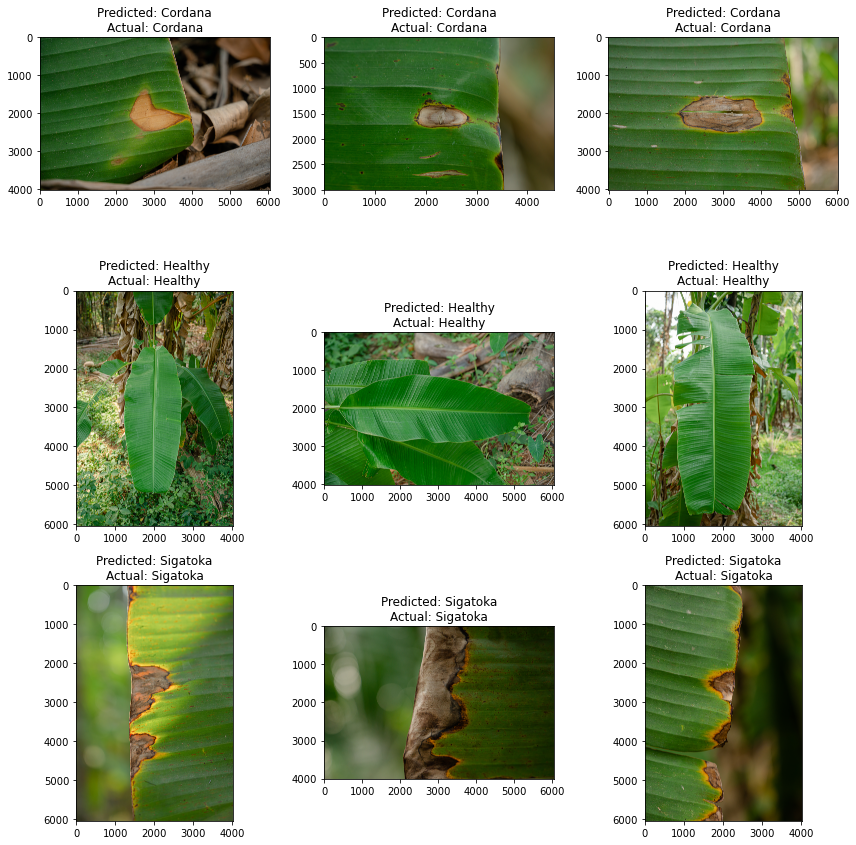

In [21]:
#Input is the folder containg Cordana
test_dir =r"C:\Users\shrav\Banana leaf disease detection\Untitled Folder\new_dataset\test"
train_dir=r"C:\Users\shrav\Banana leaf disease detection\Untitled Folder\new_dataset\train"

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, 
                                   horizontal_flip=True, validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)
# Load the class indices dictionary
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
class_dict = train_generator.class_indices
# Create a list of expected labels
expected_labels = list(class_dict.keys())

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
i = 0

# Iterate over each subfolder in the parent directory
for subfolder in os.listdir(test_dir):
    subfolder_path = os.path.join(test_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Iterate over each image file in the subfolder
    j = 0
    for img_file in os.listdir(subfolder_path):
        # Load the image using Keras' image module
        img_path = os.path.join(subfolder_path, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = train_datagen.flow(x, batch_size=1).next()

        # Make a prediction using the loaded model
        prediction = model1.predict(x)
        predicted_class_index = np.argmax(prediction)
        predicted_class_name = expected_labels[predicted_class_index]

        # Display the image and predicted class name
        img = image.load_img(img_path)
        axes[i,j].imshow(img)
        axes[i,j].set_title("Predicted: " + predicted_class_name + "\nActual: " + subfolder)
        j += 1
        if j == 3:
            break
    i += 1
    if i == 3:
        break
        
plt.tight_layout()
plt.show()


#Confusion matrix


Found 1000 images belonging to 3 classes.
1000/1000 [==============================] - 317s 317ms/step


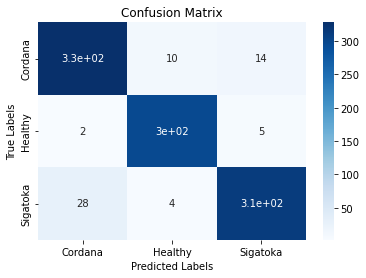

In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

# Define test dataset directory and image size
test_dir = r'C:\Users\shrav\Banana leaf disease detection\Untitled Folder\new_dataset\test_1k'
img_size = (224, 224)

# Define class names
class_names = sorted(os.listdir(test_dir))

# Create an instance of ImageDataGenerator for preprocessing the test data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load preprocessed test dataset into memory using the test_datagen
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Get the true labels from the test data generator
y_test = test_data.classes



model=model1
y_pred = np.argmax(model.predict(test_data), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
# Calculate TP, FP, TN, FN
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
F1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print('Precision:', precision)
print('Recall (Sensitivity):', recall)
print('Specificity:', specificity)
print('F1 Score:', F1_score)

Precision: [0.91620112 0.95498392 0.94259819]
Recall (Sensitivity): [0.93181818 0.97697368 0.90697674]
Specificity: [0.9537037  0.97988506 0.97103659]
F1 Score: [0.92394366 0.96585366 0.92444444]


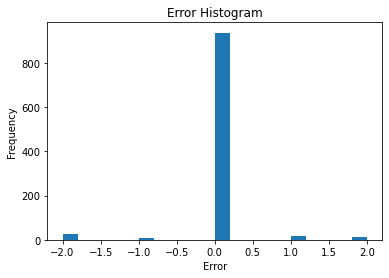

In [26]:
# Calculate the errors between the predicted and actual labels
errors = y_pred - y_test

# Create a histogram of the errors with 20 bins
plt.hist(errors, bins=20)

# Set the title and labels for the plot
plt.title("Error Histogram")
plt.xlabel("Error")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [33]:
print(errors)

[ 0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  2  0  1  0  0  0  0  1  0  0  0  0  0  0  2  1  0  0  0  0  2  0
  1  0  0  2  2  2  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0
  2  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [27]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)

# Print the report
print(report)

              precision    recall  f1-score   support

     Cordana       0.92      0.93      0.92       352
     Healthy       0.95      0.98      0.97       304
    Sigatoka       0.94      0.91      0.92       344

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Convert the true labels and predicted labels into binary matrices
y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(class_names)))

# Compute the AUC for each pairwise combination of classes
aucs = []
for i in range(len(class_names)):
    for j in range(i+1, len(class_names)):
        y_true_ij = y_test_bin[:, [i,j]]
        y_pred_ij = y_pred_bin[:, [i,j]]
        auc_ij = roc_auc_score(y_true_ij, y_pred_ij, multi_class='ovr')
        aucs.append(auc_ij)

# Compute the average AUC
avg_auc = np.mean(aucs)

print("Average AUC:", avg_auc)

Average AUC: 0.953398992792596


1000/1000 [==============================] - 315s 315ms/step


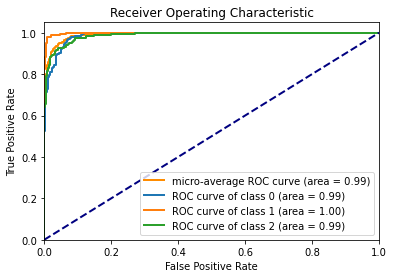

In [29]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(test_data)

# Convert y_test to binary array
y_test_bin = np.zeros((len(y_test), n_classes))
for i in range(len(y_test)):
    y_test_bin[i, y_test[i]] = 1

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()